Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
bd = pd.read_csv('banking_data.csv')

Print Info of Dataset

In [3]:
print(bd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

Finding all possible unique values in each column

In [4]:
unique_counts = bd.nunique()
print(unique_counts)

age                 77
job                 12
marital              3
marital_status       3
education            4
default              2
balance           7168
housing              2
loan                 2
contact              3
day                 31
month               12
day_month          318
duration          1573
campaign            48
pdays              559
previous            41
poutcome             4
y                    2
dtype: int64


Describe Data

In [5]:
print(bd.describe())

                age        balance           day      duration      campaign  \
count  45216.000000   45216.000000  45216.000000  45216.000000  45216.000000   
mean      40.938186    1362.277844     15.806507    258.166202      2.763668   
std       10.621249    3044.609674      8.322022    257.515482      3.097896   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.500000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45216.000000  45216.000000  
mean      40.202428      0.580657  
std      100.128248      2.303778  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Outliers in Data

In [6]:
print(bd.isnull().sum())

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


Exploring Age Column

In [7]:
print(bd['age'].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


Distribution of Age

In [8]:
#Mean
print("Mean : " , bd['age'].mean())
#Median
print("Median : " , bd['age'].median())
#Mode
print("Mode : " , bd['age'].mode())
#Standard Deviation
print("Standard Deviation : " , bd['age'].std())
#Variance
print("Variance : " , bd['age'].var())

Mean :  40.9381855980184
Median :  39.0
Mode :  0    32
Name: age, dtype: int64
Standard Deviation :  10.621249014917147
Variance :  112.81093063687848


In [9]:
print(bd['age'].value_counts())

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64


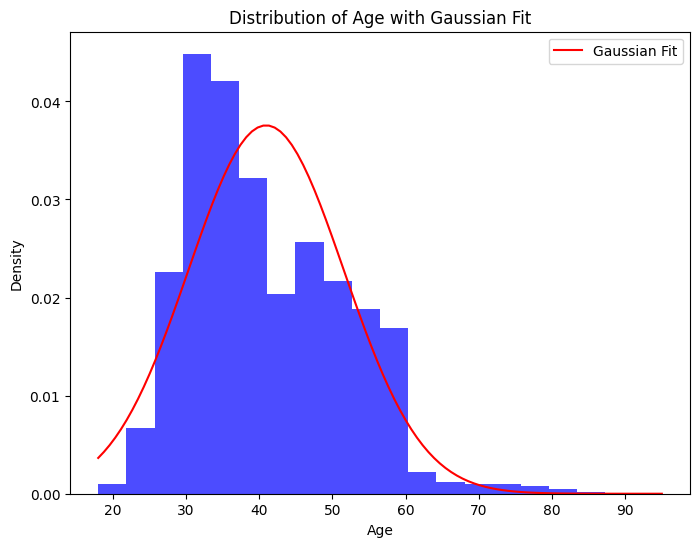

In [10]:
age = bd['age'].tolist()
mu , std  = np.mean(age) , np.std(age)
x = np.linspace(np.min(age) , np.max(age) , 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) **2)
plt.figure( figsize = (8, 6) )
plt.hist(age, bins=20, color='blue' , alpha=0.7 ,  density = True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age with Gaussian Fit')
plt.legend()
plt.show()


<Axes: xlabel='age', ylabel='Count'>

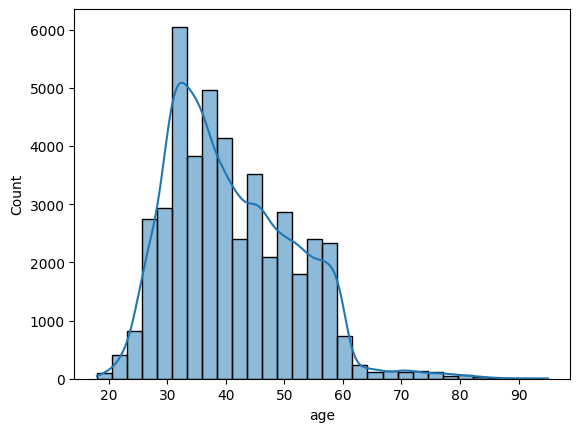

In [11]:
sns.histplot(bd['age'], bins=30 ,kde = True)

Job Type Analysis

In [13]:
print(bd['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [14]:
print(bd['job'].value_counts())

job
blue-collar      9732
management       9460
technician       7597
admin.           5171
services         4154
retired          2267
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [15]:
#Mode
print("Mode : " , bd['job'].mode())

Mode :  0    blue-collar
Name: job, dtype: object


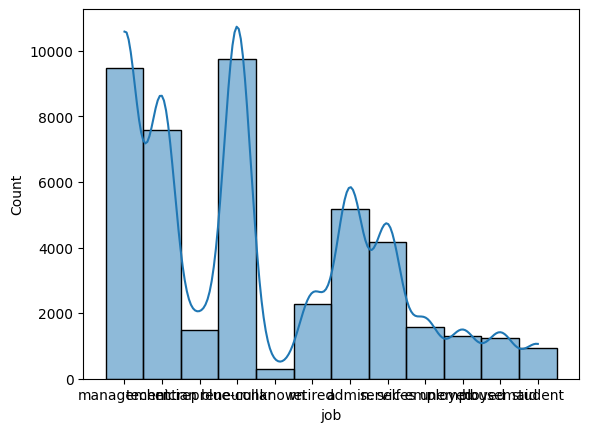

In [16]:
sns.histplot(bd['job'], kde = True)
plt.show()

<ipython-input-17-5d2cb5805c89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="job", kind="count", data=bd, palette='viridis')


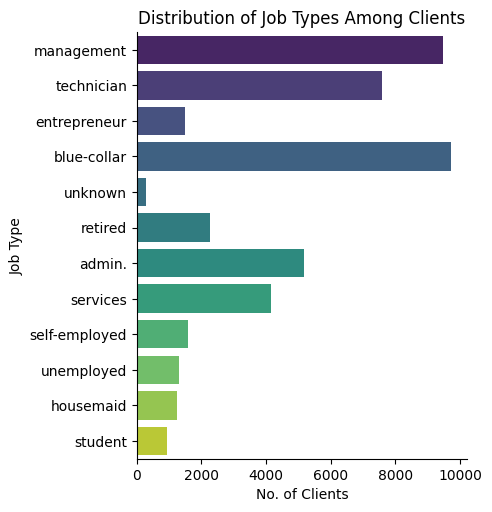

In [17]:
sns.catplot(y="job", kind="count", data=bd, palette='viridis')
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('No. of Clients')
plt.ylabel('Job Type')
plt.show()

<ipython-input-18-9a5ca2145cfb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')


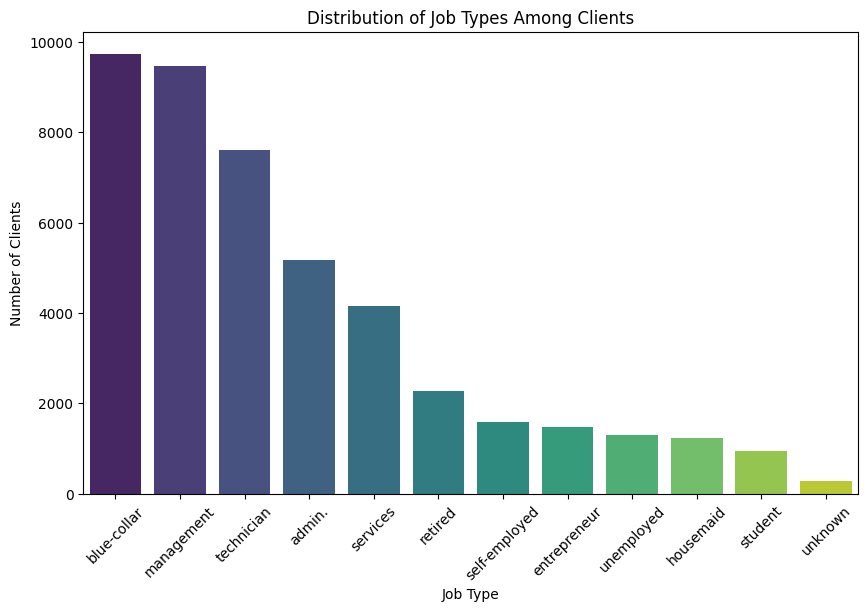

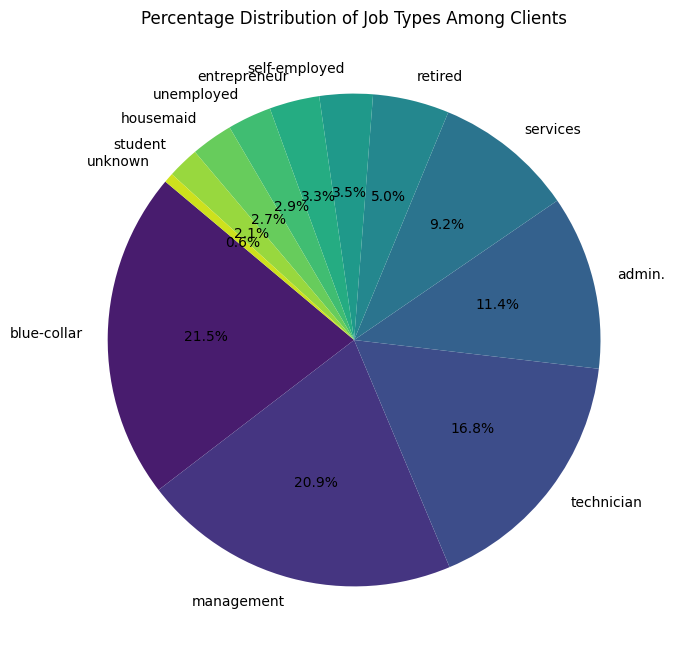

In [18]:

job_type_counts = bd['job'].value_counts()

# Calculating percentage of clients for each job type
job_percent = bd['job'].value_counts(normalize=True) * 100

# Bar chart for the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the percentages
plt.figure(figsize=(8, 8))
plt.pie(job_percent, labels=job_percent.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(job_percent)))
plt.title('Percentage Distribution of Job Types Among Clients')
plt.show()

Marital Status Distribution

In [19]:
print(bd['marital'].unique())

['married' 'single' 'divorced' nan]


In [20]:
print(bd['marital'].value_counts())

marital
married     27216
single      12790
divorced     5207
Name: count, dtype: int64


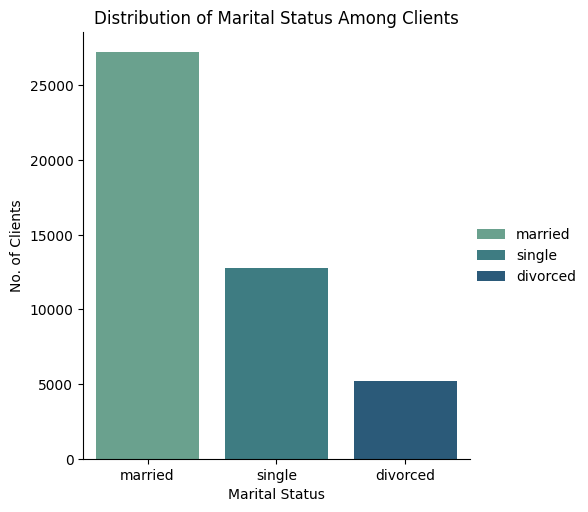

In [21]:
Marital_Status = bd['marital'].tolist()
sns.catplot(x = 'marital', hue=Marital_Status, data = bd, kind = "count" , palette = 'crest')
plt.title('Distribution of Marital Status Among Clients')
plt.xlabel('Marital Status')
plt.ylabel('No. of Clients')
plt.show()

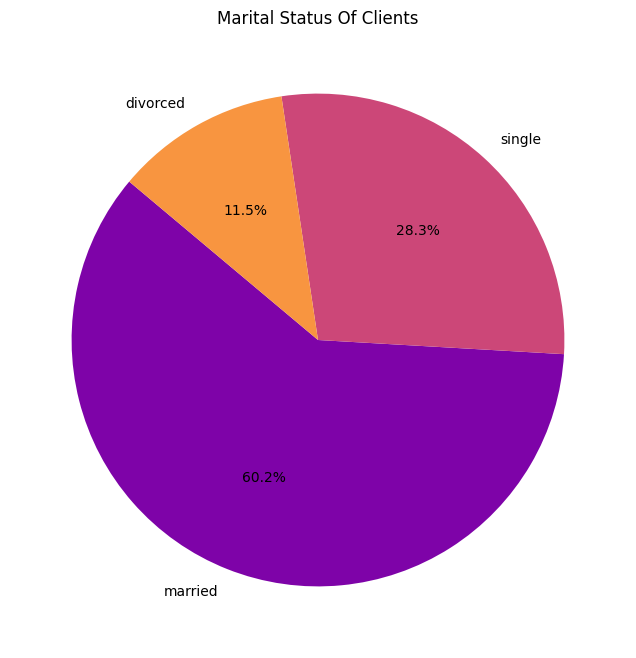

In [22]:
ms_counts = bd['marital'].value_counts()

ms_percent = bd['marital'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(ms_percent, labels=ms_percent.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(ms_percent)))
plt.title('Marital Status Of Clients')
plt.show()

Education Level Distribution

In [23]:
print(bd['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' nan]


In [24]:
print(bd['education'].value_counts())

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


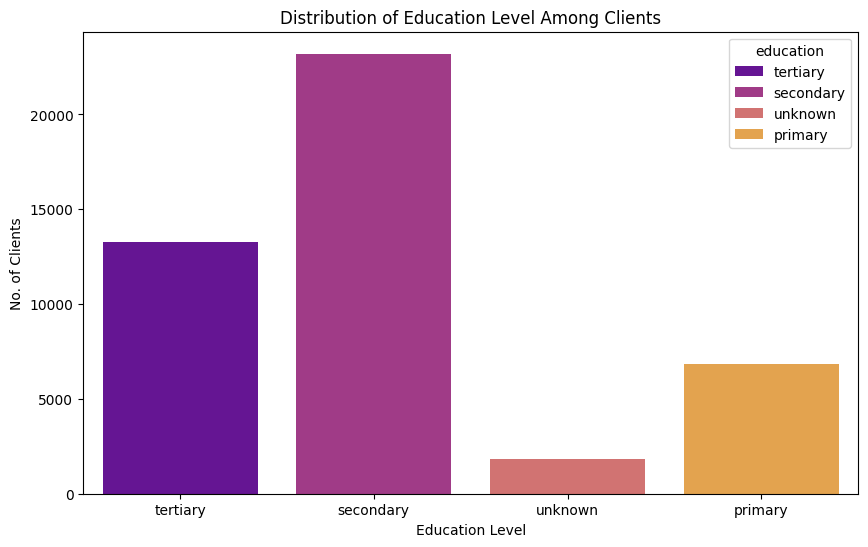

In [25]:
#Distribution of education level among clients
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='education', data=bd, palette='plasma')
plt.title('Distribution of Education Level Among Clients')
plt.xlabel('Education Level')
plt.ylabel('No. of Clients')
plt.show()

Job Type vs Education Level

In [26]:
job_education_counts = bd.groupby(['job','education'])['education'].count()
print(job_education_counts)


job            education
admin.         primary       209
               secondary    4219
               tertiary      572
               unknown       171
blue-collar    primary      3758
               secondary    5371
               tertiary      149
               unknown       454
entrepreneur   primary       183
               secondary     542
               tertiary      686
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     primary       294
               secondary    1121
               tertiary     7801
               unknown       242
retired        primary       796
               secondary     986
               tertiary      366
               unknown       119
self-employed  primary       130
               secondary     577
               tertiary      833
               unknown        39
services       primary       345
               sec

Clients with credit in default

In [27]:
print(bd['default'].unique())

['no' 'yes']


In [28]:
print(bd['default'].value_counts())

default
no     44401
yes      815
Name: count, dtype: int64


In [29]:
default_percent = bd['default'].value_counts(normalize=True) * 100
print(default_percent)

default
no     98.197541
yes     1.802459
Name: proportion, dtype: float64


Distribution of average yearly balance among clients

In [30]:
print(bd['balance'].unique())

[ 2143    29     2 ...  8205 14204 16353]


In [31]:
print(bd['balance'].mean())

1362.2778441259732


<Axes: xlabel='balance', ylabel='Count'>

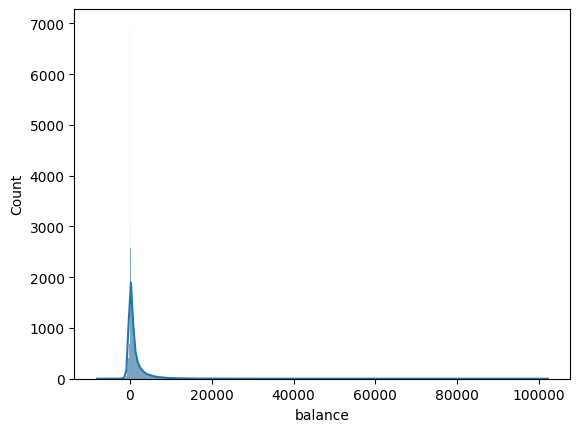

In [32]:
sns.histplot(bd['balance'], kde = True )

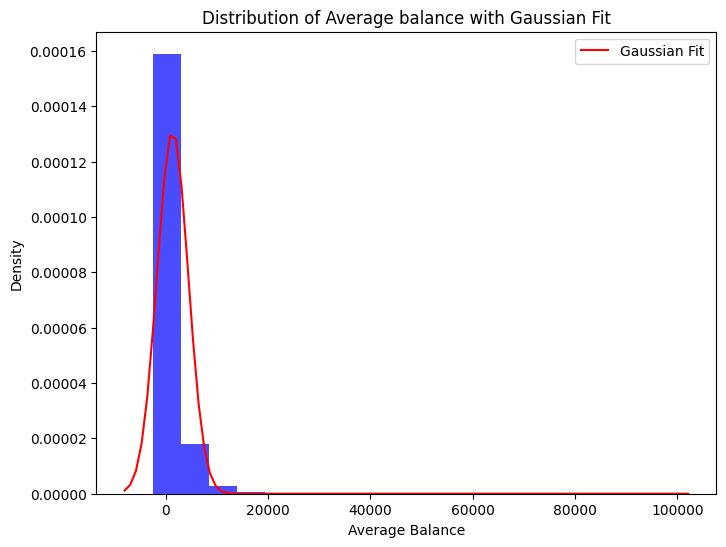

In [33]:
bal = bd['balance'].tolist()
mu , std  = np.mean(bal) , np.std(bal)
x = np.linspace(np.min(bal) , np.max(bal) , 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) **2)
plt.figure( figsize = (8, 6) )
plt.hist(bal, bins=20, color='blue' , alpha=0.7 ,  density = True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Average Balance')
plt.ylabel('Density')
plt.title('Distribution of Average balance with Gaussian Fit')
plt.legend()
plt.show()


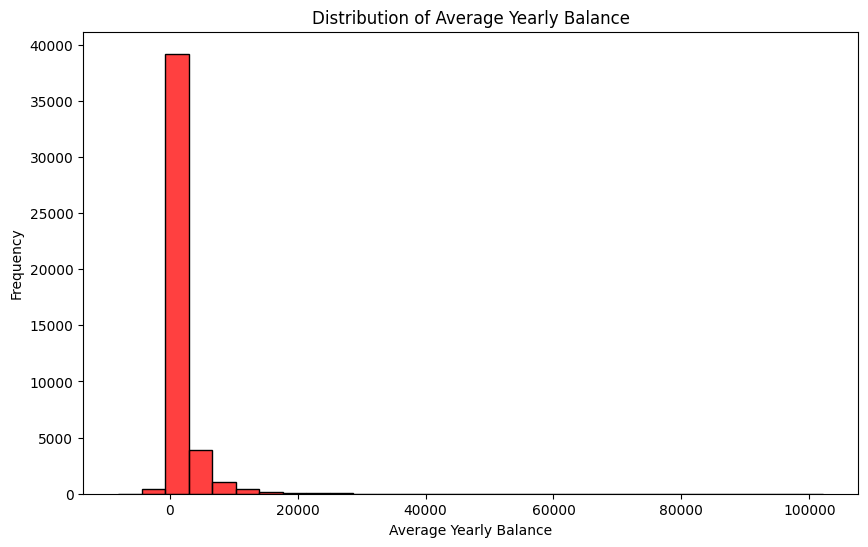

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(bd['balance'], bins=30, kde=False, color='red')
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Average Yearly Balance')
plt.ylabel('Frequency')
plt.show()

In [35]:
negative_bal = (bd['balance'] < 0).sum()
print(negative_bal)

3766


Clients with housing loan

In [36]:
print(bd['housing'].value_counts())

housing
yes    25130
no     20086
Name: count, dtype: int64


In [37]:
housing_percent = bd['housing'].value_counts(normalize=True) * 100
print(housing_percent)

housing
yes    55.577672
no     44.422328
Name: proportion, dtype: float64


Clients with personal loan

In [38]:
print(bd['loan'].value_counts())

loan
no     37972
yes     7244
Name: count, dtype: int64


In [39]:
personal_percent = bd['loan'].value_counts(normalize=True) * 100
print(personal_percent)

loan
no     83.979122
yes    16.020878
Name: proportion, dtype: float64


Types of communication used for contacting the clients

In [40]:
print(bd['contact'].unique())

['unknown' 'cellular' 'telephone']


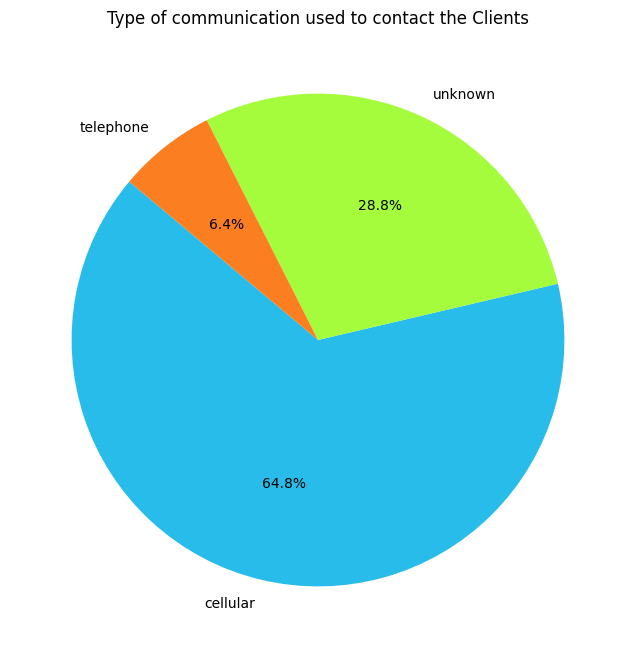

In [41]:
com_counts = bd['contact'].value_counts()


com_percent = bd['contact'].value_counts(normalize=True) * 100

# Pie chart for the percentages
plt.figure(figsize=(8, 8))
plt.pie(com_percent, labels=com_percent.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('turbo', len(com_percent)))
plt.title('Type of communication used to contact the Clients')
plt.show()

Distribution of last contact day of the month

In [42]:
print(bd['day'].unique())

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


<Axes: xlabel='day', ylabel='Count'>

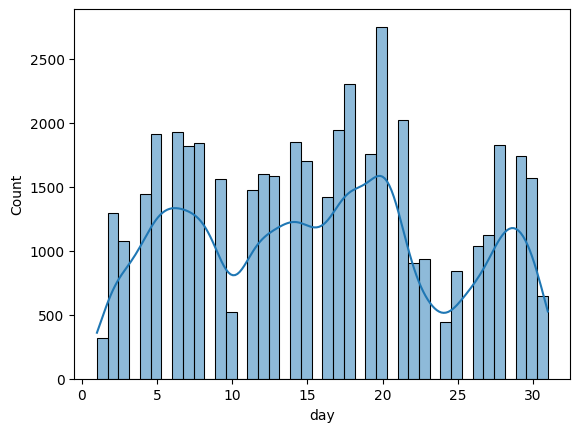

In [43]:
sns.histplot(bd['day'], kde = True )

In [44]:
print(bd['day'].value_counts())

day
20    2752
18    2308
21    2026
17    1942
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1417
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64


Last contact month of the clients

In [45]:
print(bd['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


<Axes: xlabel='month', ylabel='Count'>

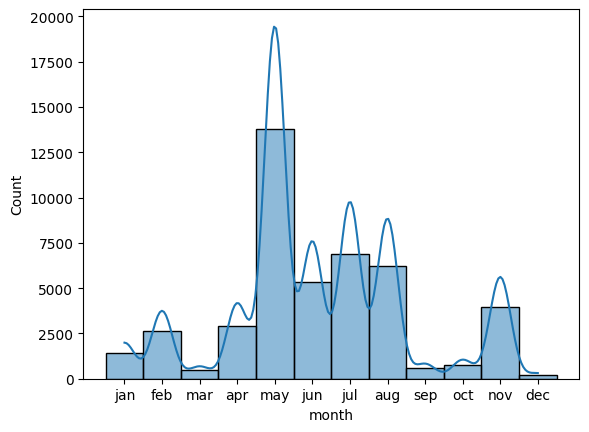

In [46]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bd['month'] = pd.Categorical(bd['month'], categories=month_order, ordered=True)

sns.histplot(bd['month'], kde=True)

Duration of the last contact

<Axes: xlabel='duration', ylabel='Count'>

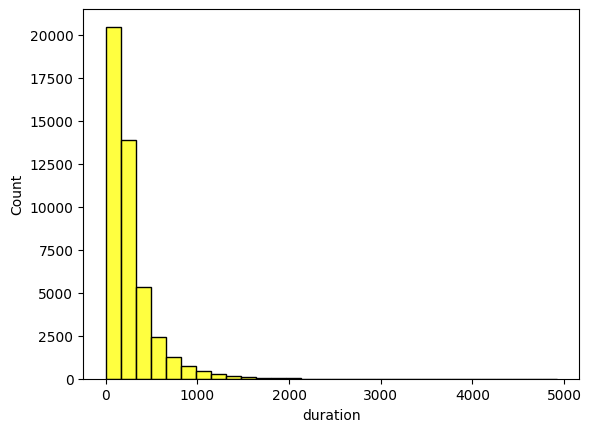

In [47]:
sns.histplot(bd['duration'], bins = 30 , color = 'yellow' )

In [48]:
print(bd['duration'].value_counts())

duration
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64


In [49]:
print(bd['duration'].unique())

[ 261  151   76 ... 1298 1246 1556]


No. of contacts performed during campaigns

In [50]:
print(bd['campaign'].unique())

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [51]:
print(bd['campaign'].value_counts())

campaign
1     17548
2     12506
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64


No. of days passed after last contact

In [52]:
print(bd['pdays'].value_counts())

pdays
-1      36956
 182      167
 92       147
 91       126
 183      126
        ...  
 32         1
 551        1
 670        1
 65         1
 530        1
Name: count, Length: 559, dtype: int64


<Axes: xlabel='pdays', ylabel='Count'>

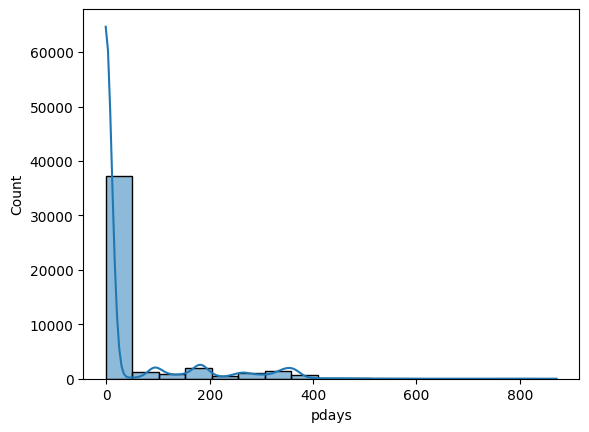

In [53]:
sns.histplot(bd['pdays'], kde = True )

No. of contacts performed before last campaign

In [54]:
print(bd['previous'])

0        0
1        0
2        0
3        0
4        0
        ..
45211    0
45212    6
45213    4
45214    8
45215    0
Name: previous, Length: 45216, dtype: int64


In [55]:
print(bd['previous'].value_counts())

previous
0      36956
1       2772
2       2106
3       1142
4        715
5        459
6        278
7        205
8        130
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


<Axes: xlabel='previous', ylabel='Count'>

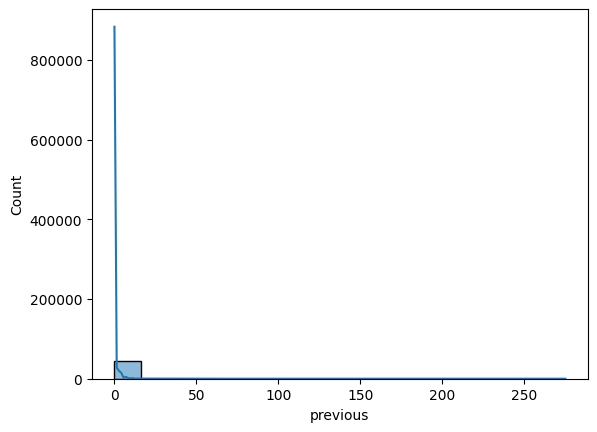

In [56]:
sns.histplot(bd['previous'], kde = True )

Outcomes of previous campaigns

In [57]:
print(bd['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [58]:
print(bd['poutcome'].value_counts())


poutcome
unknown    36961
failure     4902
other       1840
success     1513
Name: count, dtype: int64


<Axes: xlabel='poutcome', ylabel='Count'>

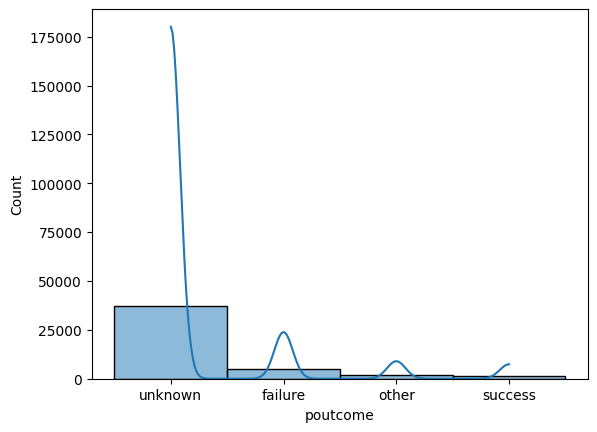

In [59]:
sns.histplot(bd['poutcome'], kde = True )

<ipython-input-60-71a0acfca399>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="poutcome", kind="count", data=bd, palette='plasma')


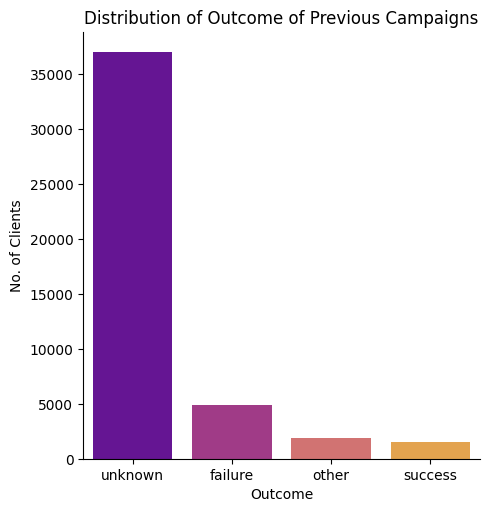

In [60]:
sns.catplot(x="poutcome", kind="count", data=bd, palette='plasma')
plt.title('Distribution of Outcome of Previous Campaigns')
plt.xlabel('Outcome')
plt.ylabel('No. of Clients')
plt.show()

Likelihood of subscribing

In [61]:
print(bd['y'].value_counts())

y
no     39922
yes     5294
Name: count, dtype: int64


<ipython-input-62-5f176593f97c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=bd, palette='plasma')


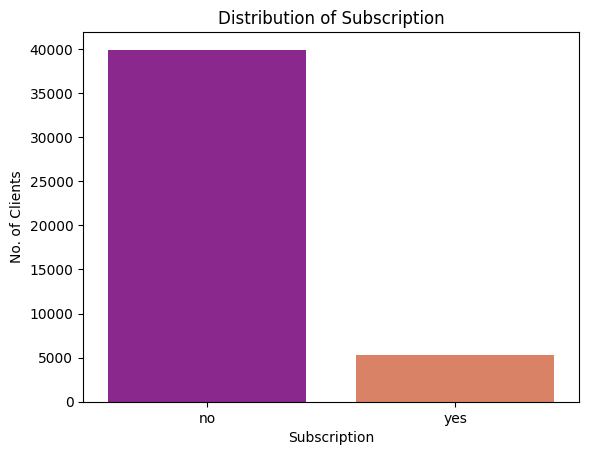

In [62]:
sns.countplot(x='y', data=bd, palette='plasma')
plt.title('Distribution of Subscription')
plt.xlabel('Subscription')
plt.ylabel('No. of Clients')
plt.show()

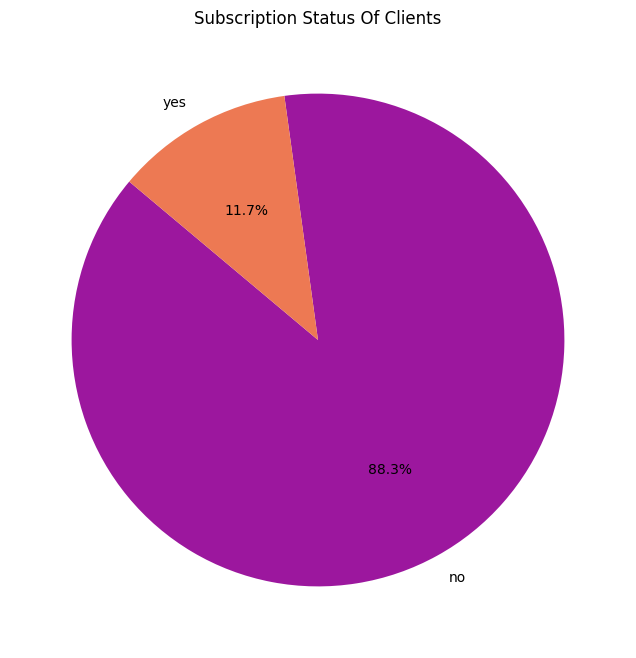

In [63]:
sub = bd['y'].value_counts()

sub_percent = bd['y'].value_counts(normalize=True) * 100

# Pie chart for the percentages
plt.figure(figsize=(8, 8))
plt.pie(sub_percent, labels=sub_percent.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(sub_percent)))
plt.title('Subscription Status Of Clients')
plt.show()

In [64]:
subs_age = bd.groupby('y')['age'].value_counts()
print(subs_age)

y    age
no   32     1864
     31     1790
     33     1762
     34     1732
     35     1685
            ... 
yes  87        3
     90        2
     92        2
     93        2
     95        1
Name: count, Length: 148, dtype: int64


In [66]:
subs_job = bd.groupby('y')['job'].value_counts()
print(subs_job)

y    job          
no   blue-collar      9024
     management       8157
     technician       6757
     admin.           4540
     services         3785
     retired          1748
     self-employed    1392
     entrepreneur     1364
     housemaid        1131
     unemployed       1101
     student           669
     unknown           254
yes  management       1303
     technician        840
     blue-collar       708
     admin.            631
     retired           519
     services          369
     student           269
     unemployed        202
     self-employed     187
     entrepreneur      123
     housemaid         109
     unknown            34
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

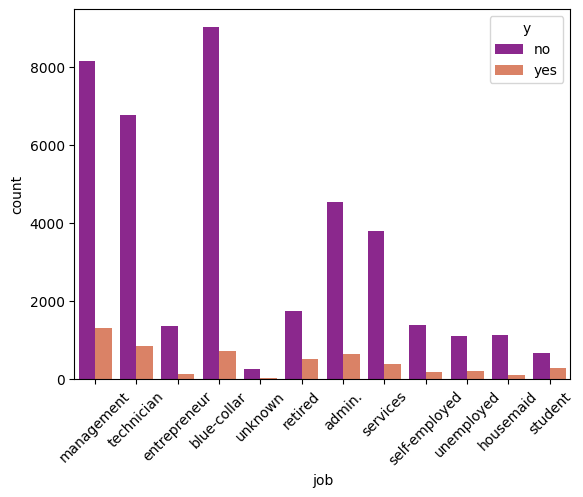

In [67]:
sns.countplot(x='job', hue='y', data=bd, palette='plasma')
plt.xticks(rotation=45)

In [68]:
subs_education = bd.groupby('y')['education'].value_counts()
print(subs_education)

y    education
no   secondary    20752
     tertiary     11304
     primary       6259
     unknown       1605
yes  secondary     2452
     tertiary      1997
     primary        592
     unknown        252
Name: count, dtype: int64
